In [29]:
import scipy.integrate as integrate
import math
import numpy as np
import matplotlib.pyplot as plt


In [30]:
# Interval
lower_limit = 0
upper_limit = 1
period = upper_limit - lower_limit

frequency = 2 * math.pi / 2 * period

In [31]:
def even_func(x): 
    return 1 - x if x > 0 else 1 + x

def odd_func(x):
    return 1 - x if x > 0 else -1 - x

def odd_linear_add(x):
    return odd_func(x) - odd_func(0) - (odd_func(1) - odd_func(0))

In [32]:
def a_n(n, function) -> float:
    res = 2 * integrate.quad(lambda x: (function(x) * math.cos(frequency * n * x)), lower_limit, upper_limit)[0]
    return res

def b_n(n, function) -> float:
    res = 2 * integrate.quad(lambda x: (function(x) * math.sin(frequency * n * x)), lower_limit, upper_limit)[0]
    return res

In [33]:
def fourie_even_indexes(N, function):
    an_results = np.zeros(N, dtype=float)
    an_results[0] = a_n(0, function) / 2
    
    for n in range(1, N):
        an_results[n] = a_n(n, function)
    return an_results

def fourie_odd_indexes(N, function):
    bn_results = np.zeros(N, dtype=float)
    
    for n in range(1, N):
        bn_results[n] = b_n(n, function)
    return bn_results

In [34]:
def even_DFT(x, N, furier_indexes):
    S = 0
    for n in range(0, N):
        S += furier_indexes[n] * math.cos(n * frequency * x)
    return S



def odd_DFT(x, N, furier_indexes):
    S = 0
    for n in range(0, N):
        S += furier_indexes[n] * math.sin(n * frequency * x)
    return S

In [109]:
def plot_function_and_approximation(function, DFT, N, furier_indexes):
    step = 0.005
    x_points = np.arange(-upper_limit, upper_limit + step, step)
    f_results = np.zeros_like(x_points, dtype=float)
    FS_results = np.zeros_like(x_points, dtype=float)
    
    for ind in range(0, x_points.shape[0]):
        f_results[ind] = function(x_points[ind])
        FS_results[ind] = DFT(x_points[ind], N, furier_indexes)
    fig = plt.figure(figsize = (10, 5))
    plt.xlabel('x')
    plt.ylabel('f')
  
    plt.plot(x_points, f_results, label='initial function')
    plt.plot(x_points, FS_results, color='red', label='fourie approximation')
    plt.legend()
    plt.grid()
    return 

In [110]:
def plot_indexes(coeff_str: str, fourie_indexes):
    n_points = np.arange(0, len(fourie_indexes))
    
    fig = plt.figure(figsize = (10, 5))

    ax = fig.gca()
    ax.set_xticks(np.arange(0, len(fourie_indexes), 10))
    plt.xlabel('n')
    plt.ylabel(coeff_str)
    
    plt.plot(n_points, fourie_indexes, 'bo', label='fourie coefficients')
    plt.plot(n_points, fourie_indexes, 'purple')
    plt.legend()
    plt.grid()
    return 

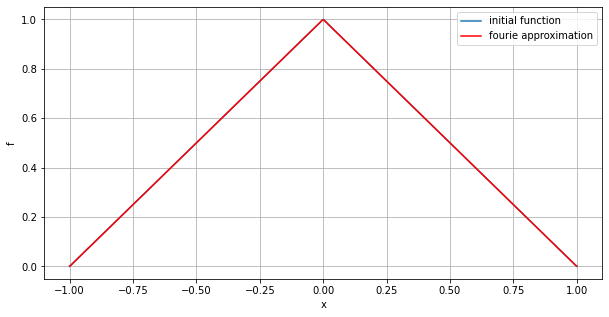

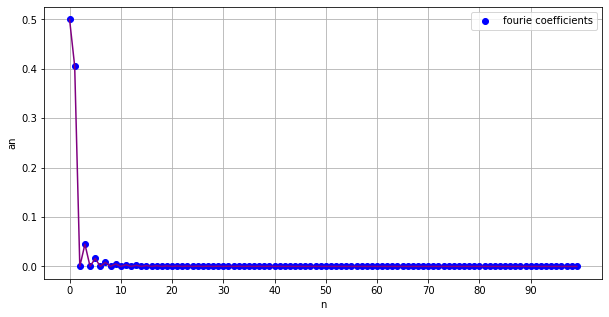

In [111]:
N = 100 # Кол-во членов ряда

# Продолжим чётным образом
even_indexes = fourie_even_indexes(N, even_func)
plot_function_and_approximation(even_func, even_DFT, N, even_indexes)
plot_indexes('an', even_indexes)

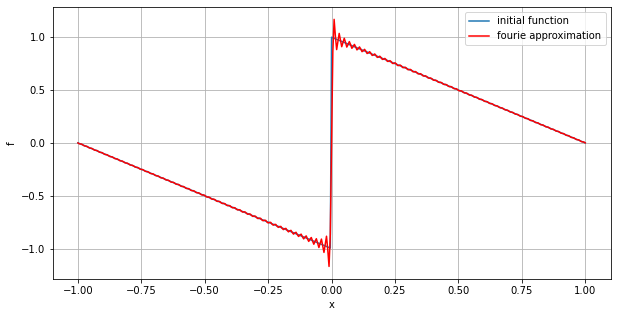

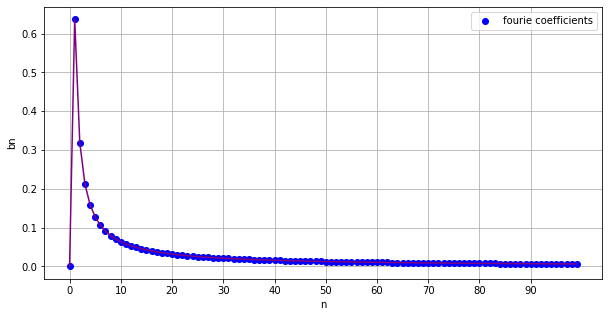

In [112]:
# Продолжим нечётным образом
odd_indexes = fourie_odd_indexes(N, odd_func)
plot_function_and_approximation(odd_func, odd_DFT, N, odd_indexes)
plot_indexes('bn', odd_indexes)

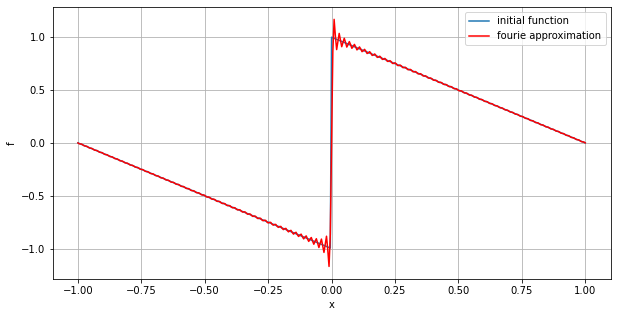

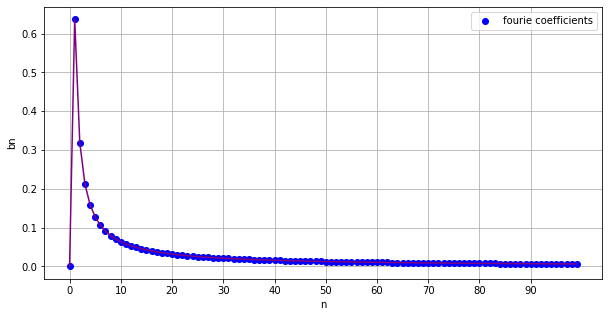

In [113]:
# Как можно видеть, с линейной добавкой всё также!
odd_indexes = fourie_odd_indexes(N, odd_linear_add)
plot_function_and_approximation(odd_linear_add, odd_DFT, N, odd_indexes)
plot_indexes('bn', odd_indexes)